# A simple handwritten digit classifier

The following example shows how to create a convolutional neural network using the framework and train on the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.

## Importing all the necessary libraries

Import the DL package.

In [1]:
import revgraph.dl as dl

The library also ships with the mnist dataset for users to mess around with it.

In [2]:
import revgraph.datasets.mnist as mnist

Also `matplotlib` for visualization

In [3]:
import matplotlib.pyplot as plt

Enable inline plot

In [4]:
%matplotlib inline

And `numpy` for a little bit of processing

In [5]:
import numpy as np

Initialize `numpy.random` with seed 42

In [6]:
np.random.seed(42)

## Loading the dataset

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Defining the model

Just a random CNN configuration...

In [8]:
layers = dl.sequential(
    dl.inputs(784),
    dl.reshape((28, 28, 1)),
    dl.conv2d(
        filters=12,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        use_bias=True,
        kernel_regularizer=dl.l1(),
        bias_regularizer=dl.l1(),
        bias_initializer='zeros'
    ),
    dl.flatten(),
    dl.dense(
        units=128,
        activation='relu',
        use_bias=True,
        kernel_regularizer=dl.l1(),
        bias_regularizer=dl.l1()
    ),
    dl.dense(
        units=10,
        activation='softmax',
        use_bias=True,
        kernel_regularizer=dl.l1(),
        bias_regularizer=dl.l1()
    )
)

Bind the layers with the loss function, optimizer and metrics.

In [9]:
model = dl.Model(
    model=layers,
    loss=dl.categorical_cross_entropy(),
    optimizer=dl.adam(lr=0.01, decay=0.01),
    metrics={ 'Accuracy': dl.categorical_accuracy() }
)

Now we "compile" the model to a computational graph

In [10]:
model.compile()

## Training the model

Note that the validation set used is the remaining 15% of `(x_train, y_train)`, while the test set is stored in completely different variables `(x_test, y_test)`.

In [11]:
model.fit(
    x_train,
    y_train,
    epochs=3,
    batch_size=500,
    train_test_validation=(0.85, 0, 0.15),
    callbacks=[
        dl.callbacks.progress(),
        dl.callbacks.validation(),
        dl.callbacks.test(x_test=x_test, y_test=y_test)
    ]
)

Training Model tensor(addr=0x116414e50) with 51000 records
  + Epoch 1/3
    [##########] (100.0%)
    Time Elapsed: 96.155s
    Validation Accuracy: 0.9758888888888889
  + Epoch 2/3
    [##########] (100.0%)
    Time Elapsed: 94.594s
    Validation Accuracy: 0.9803333333333333
  + Epoch 3/3
    [##########] (100.0%)
    Time Elapsed: 94.006s
    Validation Accuracy: 0.9827777777777778
Training Completed.
Total Time Elapsed: 324.236s
Test Accuracy: 0.981


98.1% Accuracy! Not bad I guess.

## Visualizing the results

Randomly sample 20 images

In [12]:
w, h = 4, 5
indices = np.random.choice([i for i in range(10000)], w*h)
images = map(lambda i: x_test[i], indices)

Creating the plot

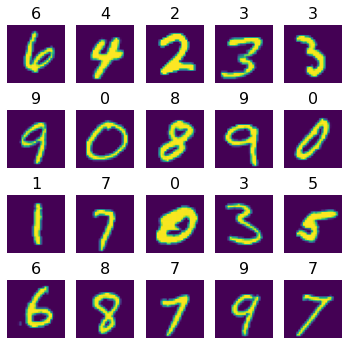

In [13]:
fig = plt.figure(figsize=(6, 6))
for i, image in zip(range(1, w*h+1), images):
    subplot = fig.add_subplot(w, h, i)
    pred = model.predict_one(image)
    digit = np.argmax(pred)
    subplot.set_title(digit, fontsize=16)
    subplot.axis('off')
    plt.imshow(image.reshape(28, 28))

Nice :)